In [1]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 661.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 658.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]]


In [22]:
import pandas as pd
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('wp_log_R.csv')
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


<Axes: xlabel='ds'>

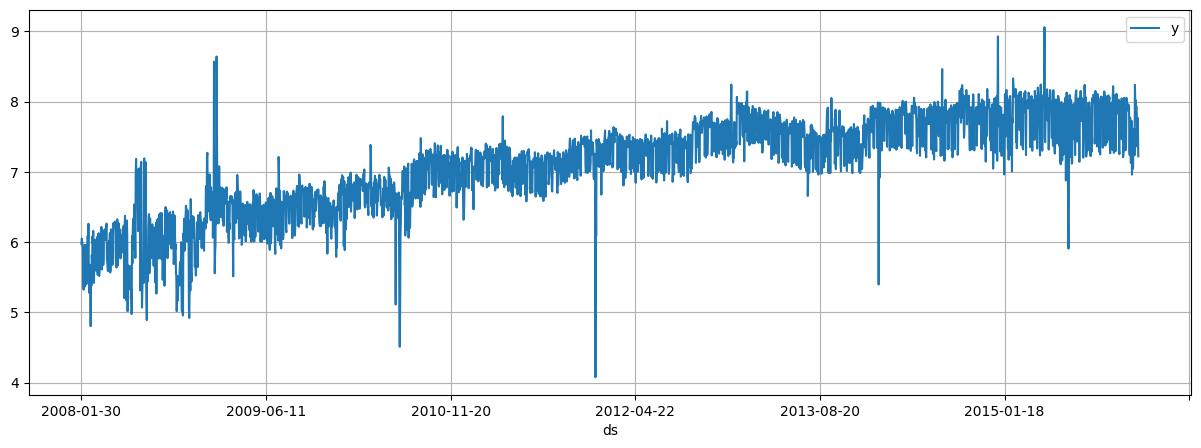

In [5]:
df.plot(x='ds', y='y', figsize=(15,5), grid=True)

In [6]:
m = Prophet()
m.fit(df)

16:16:17 - cmdstanpy - INFO - Chain [1] start processing
16:16:18 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=365) # имеющийся период + год
future.tail()

,ds
3223,2016-12-26
3224,2016-12-27
3225,2016-12-28
3226,2016-12-29
3227,2016-12-30


In [10]:
forecast = m.predict(future)
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3223,2016-12-26,7.805592,7.210448,7.956933,7.558458,8.023202,-0.215966,-0.215966,-0.215966,0.099471,0.099471,0.099471,-0.315438,-0.315438,-0.315438,0.0,0.0,0.0,7.589625
3224,2016-12-27,7.805640,7.277828,8.004459,7.557022,8.023221,-0.148652,-0.148652,-0.148652,0.163570,0.163570,0.163570,-0.312222,-0.312222,-0.312222,0.0,0.0,0.0,7.656988
3225,2016-12-28,7.805688,7.283977,8.045026,7.555587,8.023241,-0.136055,-0.136055,-0.136055,0.169011,0.169011,0.169011,-0.305066,-0.305066,-0.305066,0.0,0.0,0.0,7.669633
3226,2016-12-29,7.805736,7.269970,8.017918,7.554938,8.023260,-0.144968,-0.144968,-0.144968,0.149033,0.149033,0.149033,-0.294001,-0.294001,-0.294001,0.0,0.0,0.0,7.660768
3227,2016-12-30,7.805784,7.203045,7.935192,7.554363,8.024308,-0.227488,-0.227488,-0.227488,0.051645,0.051645,0.051645,-0.279132,-0.279132,-0.279132,0.0,0.0,0.0,7.578297


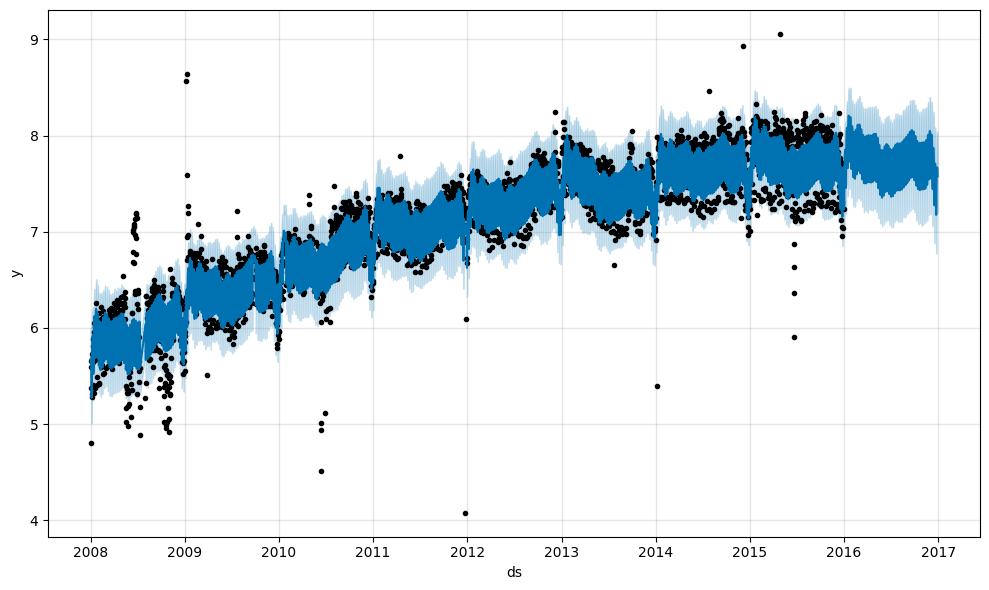

In [11]:
# в Prophet есть встроенная функция для построения ряда
f = m.plot(forecast)

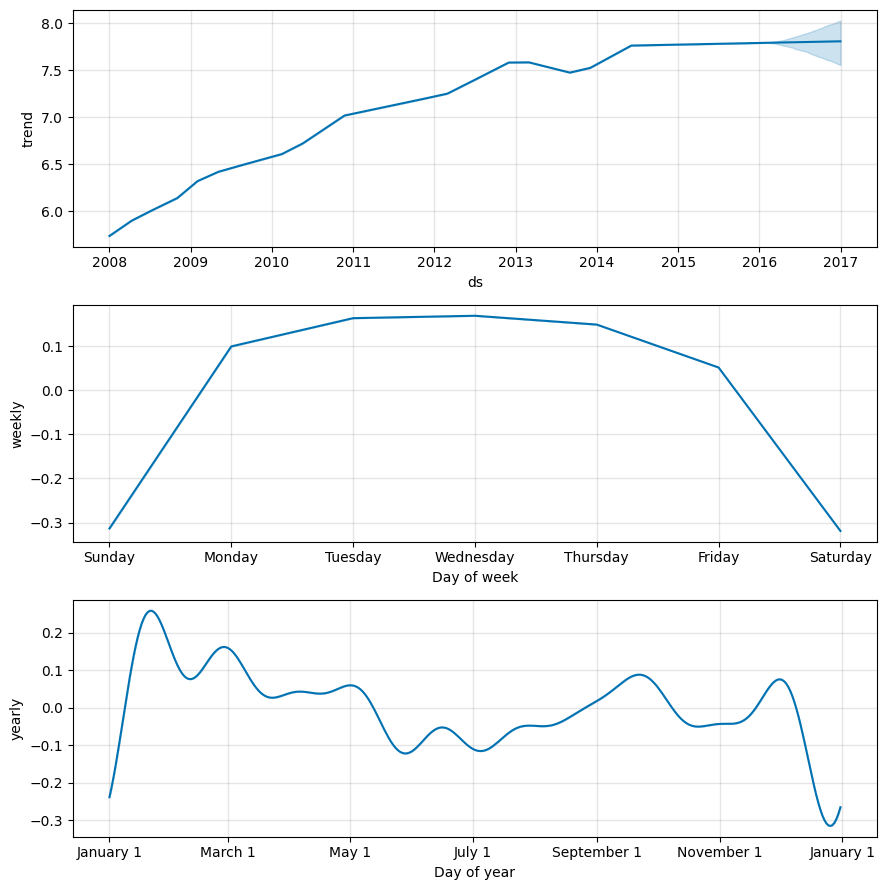

In [13]:
f = m.plot_components(forecast)

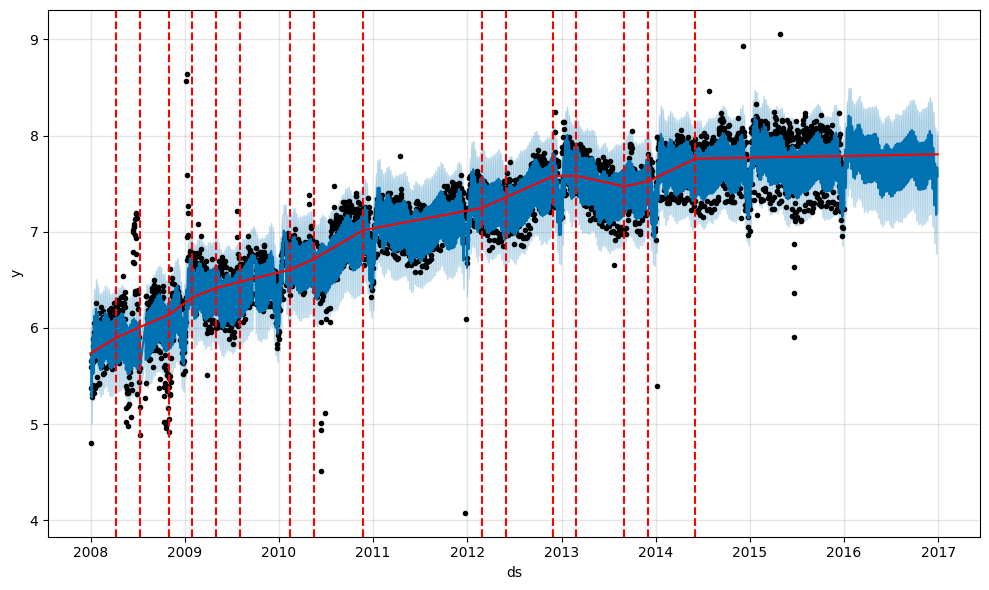

In [14]:
# чтобы отобразить точки перемены тренда, используем специальную доп функцию add_changepoints_to_plot
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [15]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)

12:05:04 - cmdstanpy - INFO - Chain [1] start processing
12:05:04 - cmdstanpy - INFO - Chain [1] done processing


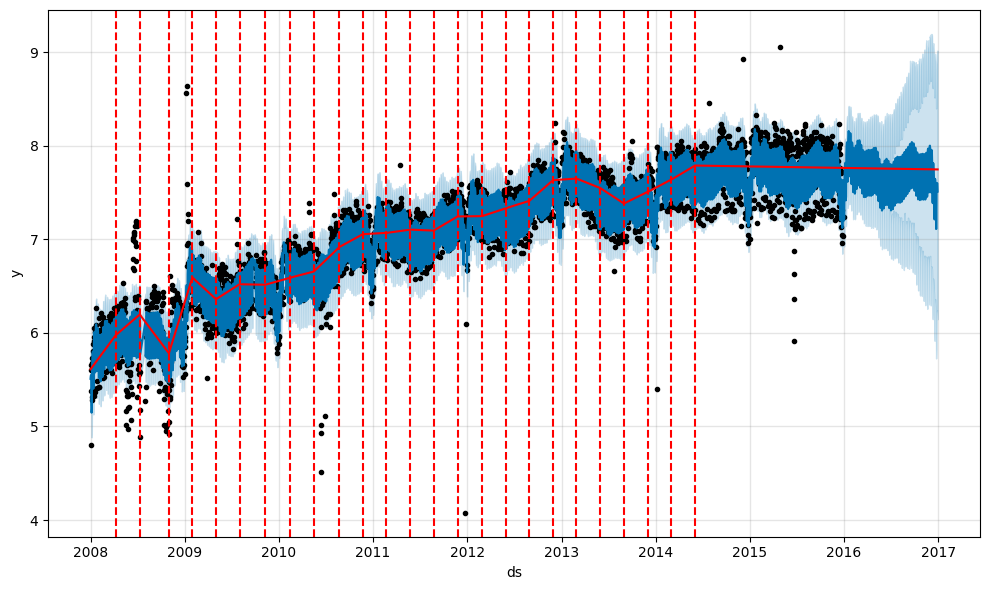

In [17]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [18]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)

12:09:47 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing


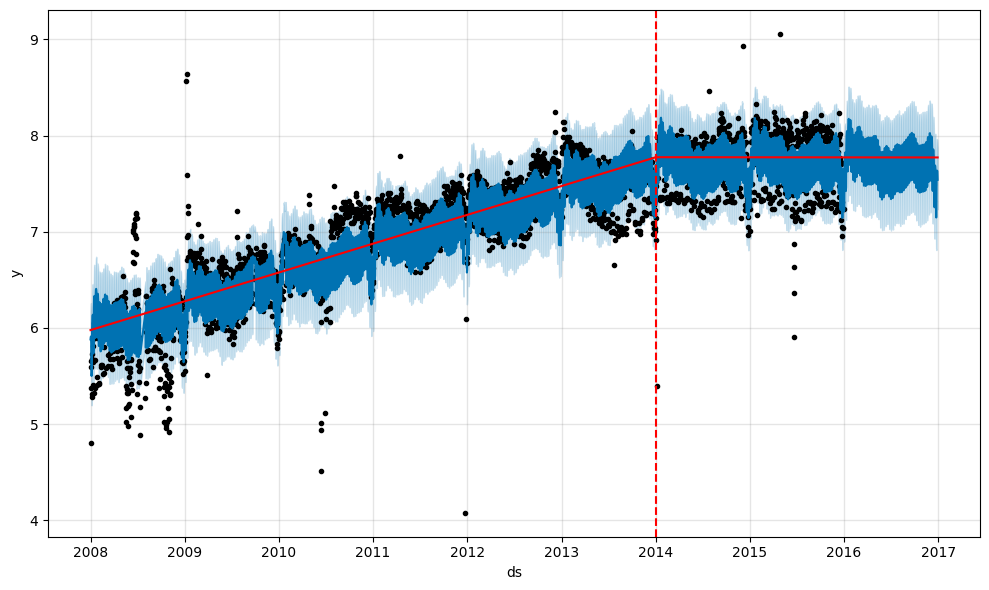

In [19]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [21]:
# укажем одинаковую вместимость на весь период
df['cap'] = 8.5

In [23]:
# новая модель с логистическим трендом
m = Prophet(growth='logistic')
m.fit(df)

12:54:16 - cmdstanpy - INFO - Chain [1] start processing
12:54:17 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# продлим датафрейм сразу на 5 лет, предполагая ту же вместимость тренда

future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5

In [25]:
forecast = m.predict(future)

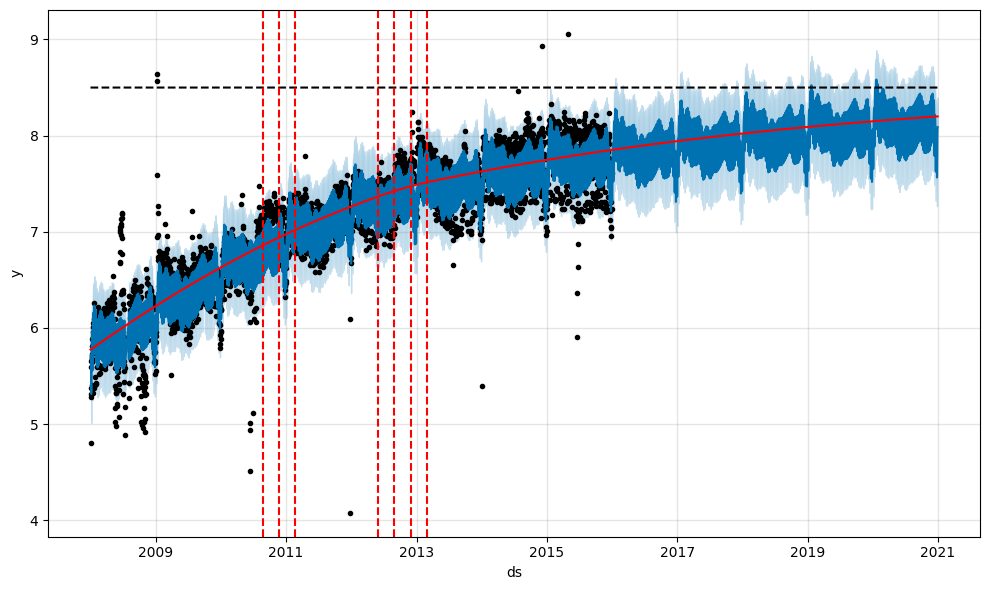

In [26]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Праздники и другие события

In [33]:
from prophet.plot import add_changepoints_to_plot

In [36]:
playoffs = pd. DataFrame ({
    'holiday': 'playoff',
    'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                          '2010-01-24', '2010-02-07', '2011-01-08',
                          '2013-01-12', '2014-01-12', '2014-01-19',
                          '2014-02-02', '2015-01-11', '2016-01-17',
                          '2016-01-24', '2016-02-07' ]),
    'lower_window': 0,
    'upper_window': 1,
})

superbowls = pd. DataFrame ({
    'holiday': 'superbowl',
    'ds': pd.to_datetime (['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window': 0,
    'upper_window': 1,
})

holidays = pd.concat((playoffs, superbowls))

holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [37]:
# передаём кастомные праздники
m = Prophet(holidays=holidays)

# добавляем встроенные для США
m.add_country_holidays(country_name='US')

m.fit(df)

13:25:00 - cmdstanpy - INFO - Chain [1] start processing
13:25:00 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                Thanksgiving Day
8                   Christmas Day
9      Martin Luther King Jr. Day
10          Washington's Birthday
11                   Columbus Day
12    Independence Day (observed)
13      New Year's Day (observed)
14       Christmas Day (observed)
15        Veterans Day (observed)
dtype: object

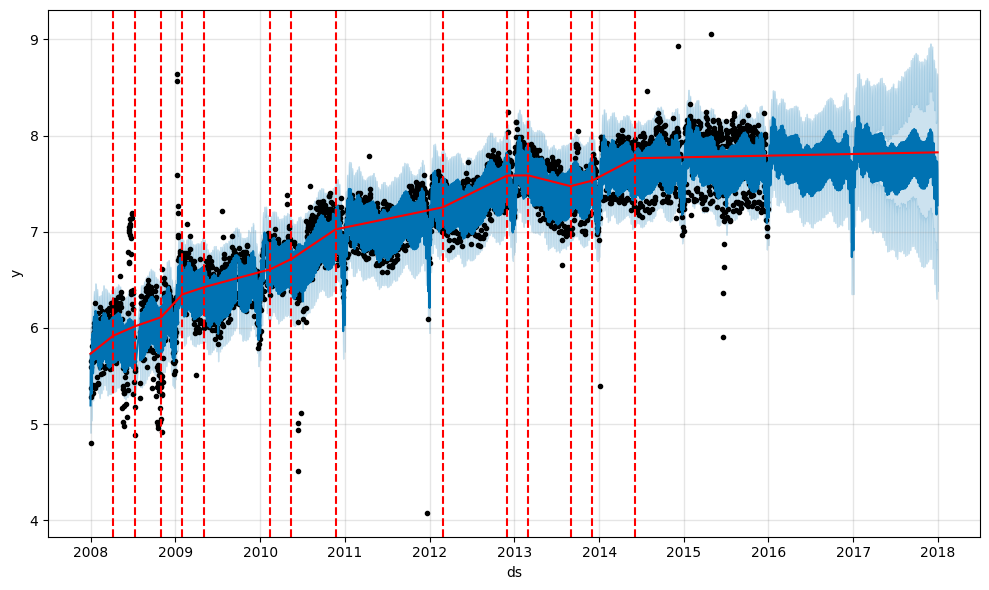

In [39]:
future = m.make_future_dataframe(periods=730)

forecast = m.predict(future)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

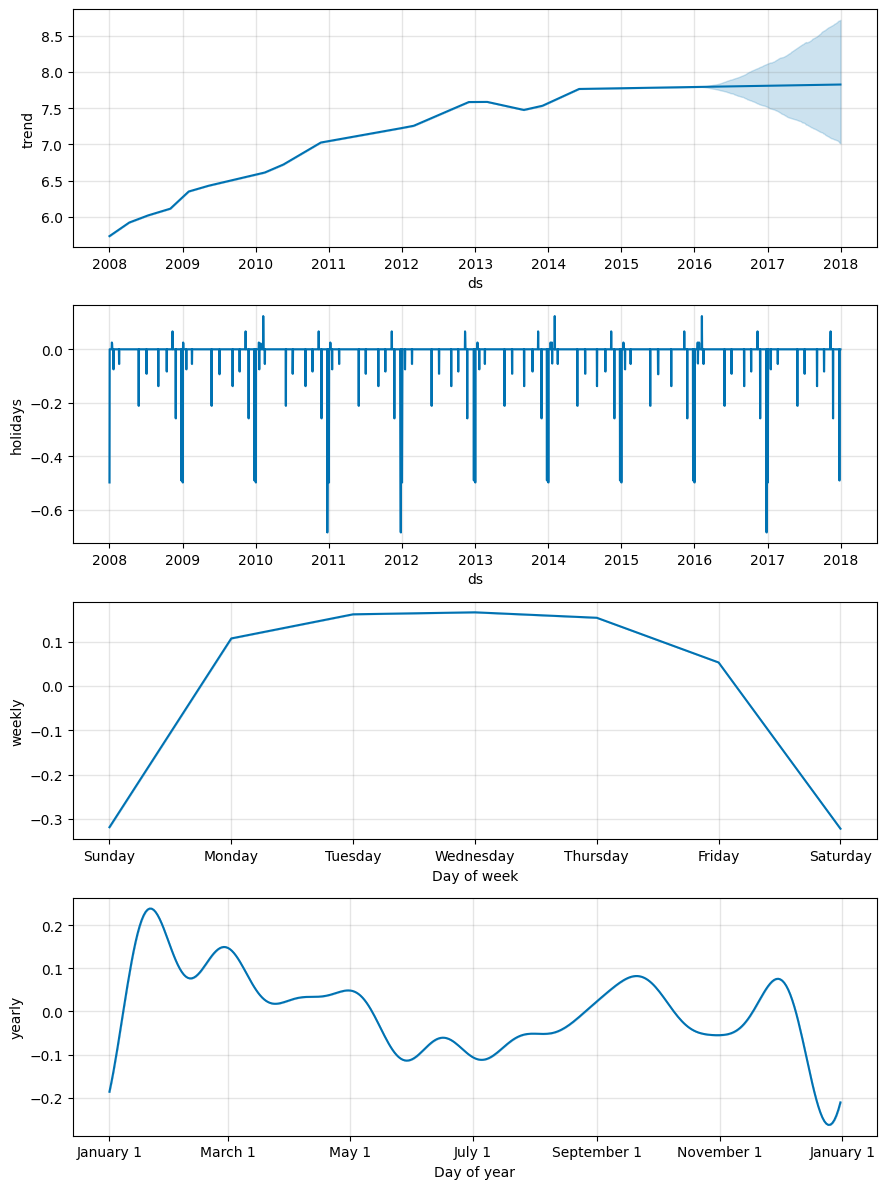

In [40]:
fig = m.plot_components(forecast)

Настройка сезонности

12:26:05 - cmdstanpy - INFO - Chain [1] start processing
12:26:06 - cmdstanpy - INFO - Chain [1] done processing


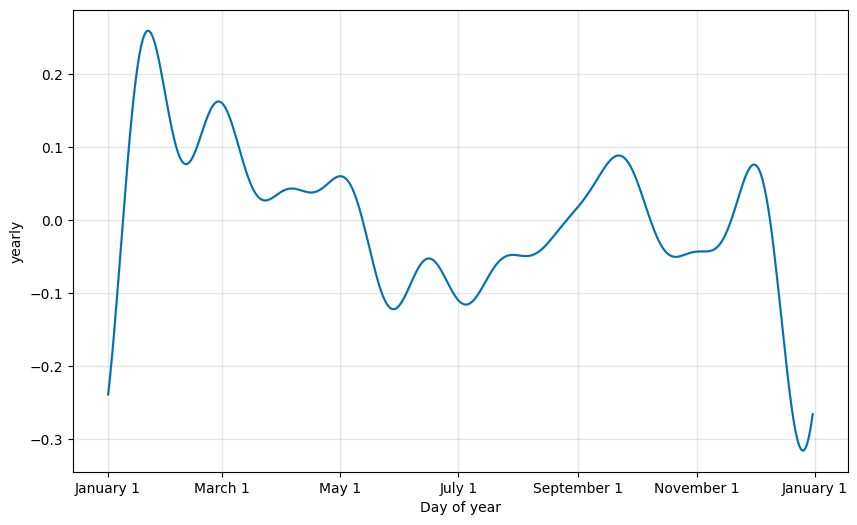

In [41]:
# будем строить отдельно график годовой сезонности

from prophet.plot import plot_yearly

m = Prophet().fit(df)

a = plot_yearly(m)

12:27:38 - cmdstanpy - INFO - Chain [1] start processing
12:27:38 - cmdstanpy - INFO - Chain [1] done processing


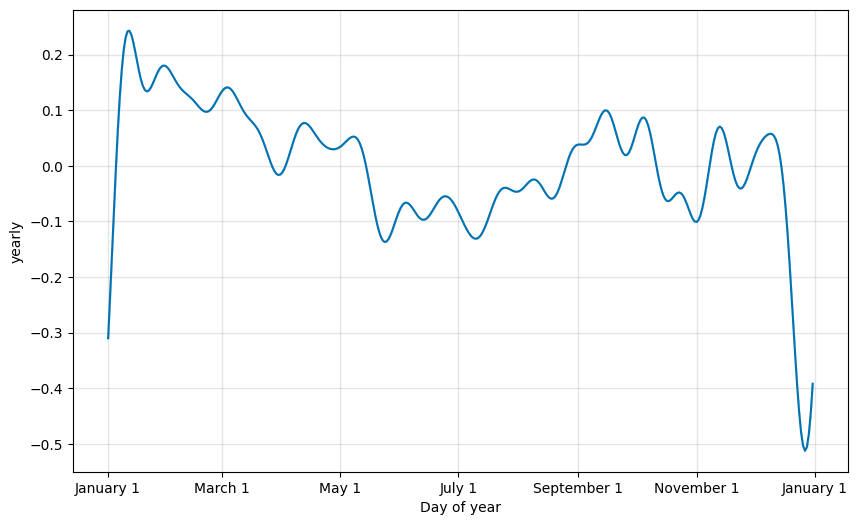

In [42]:
# попробуем увеличить порядок до 20

m = Prophet(yearly_seasonality=20).fit(df)

a = plot_yearly(m)

12:28:58 - cmdstanpy - INFO - Chain [1] start processing
12:28:58 - cmdstanpy - INFO - Chain [1] done processing


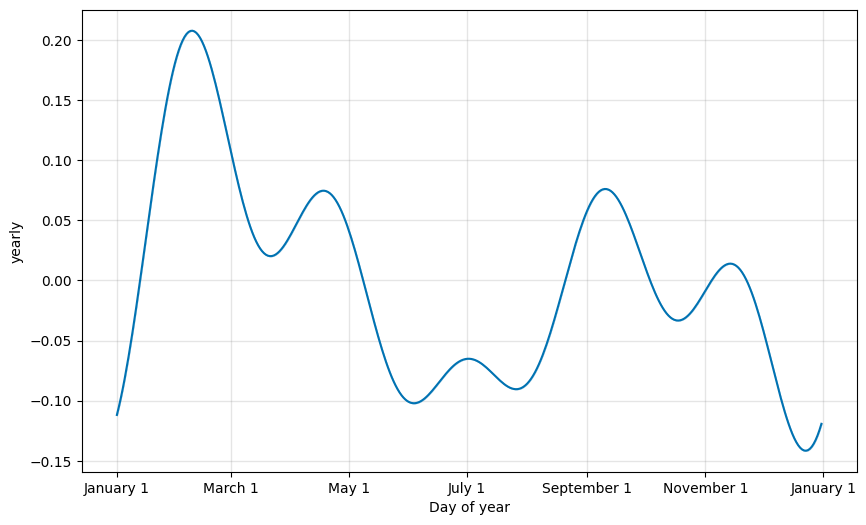

In [43]:
# или уменьшить до 5

m = Prophet(yearly_seasonality=5).fit(df)

a = plot_yearly (m)

12:30:49 - cmdstanpy - INFO - Chain [1] start processing
12:30:49 - cmdstanpy - INFO - Chain [1] done processing


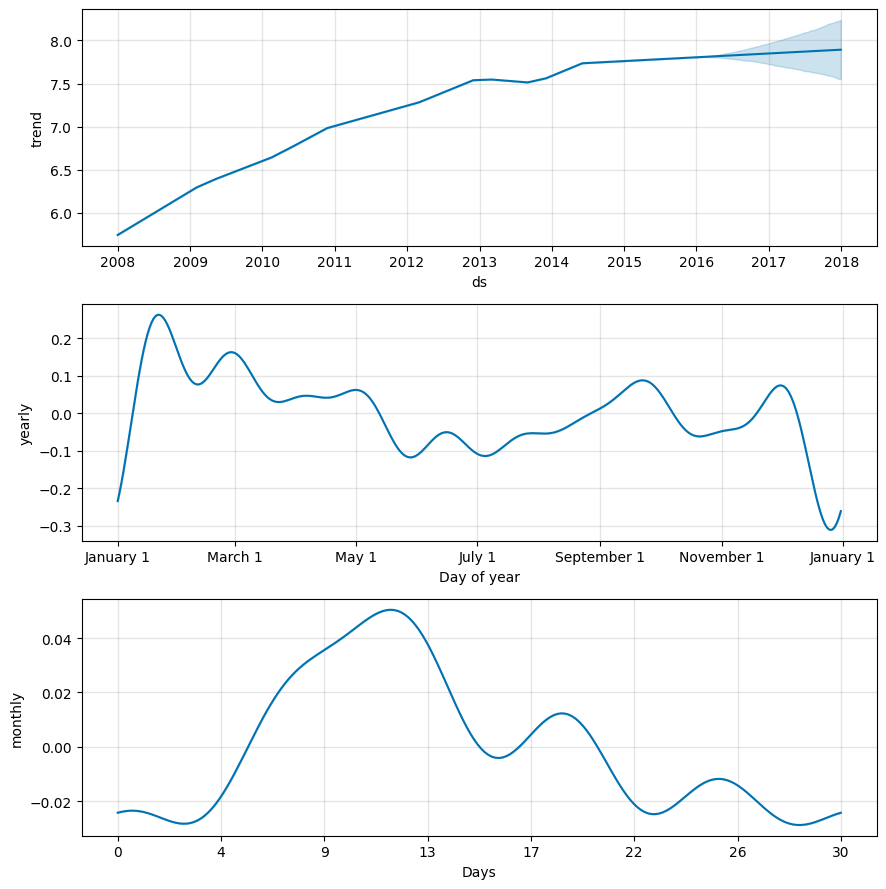

In [44]:
# удалим недельную сезонность
m = Prophet(weekly_seasonality=False)

# добавим месячную сезонность (с периодом 30.5 и порядком 5)
m.add_seasonality(name= 'monthly', period=30.5, fourier_order=5)

forecast = m.fit(df).predict(future)

fig = m.plot_components(forecast)

Дополнительные регрессоры

12:38:36 - cmdstanpy - INFO - Chain [1] start processing
12:38:37 - cmdstanpy - INFO - Chain [1] done processing


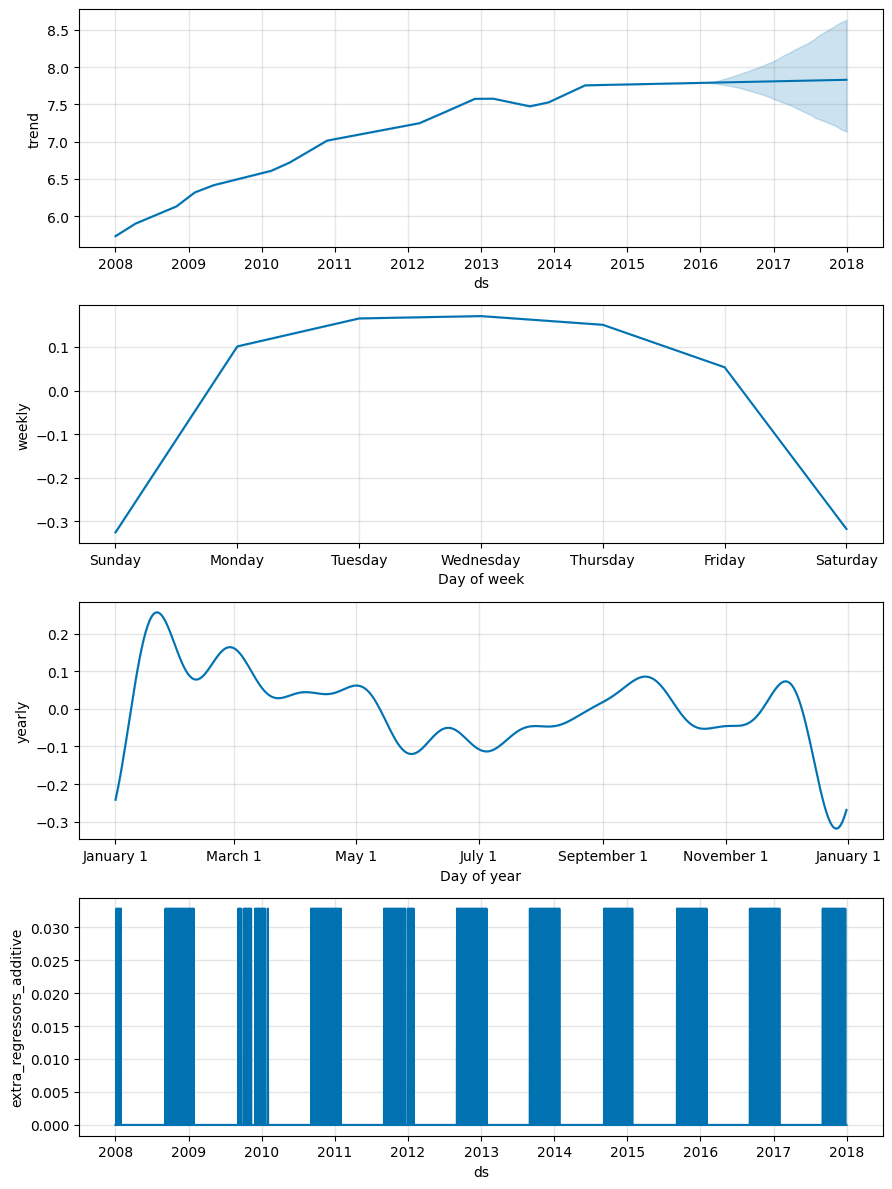

In [47]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    # сезон NFL длится с сентября по январь
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
        
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)

m = Prophet()
m.add_regressor('nfl_sunday') # учёт колонки датафрейма в качестве доп регрессора
m. fit(df)

# в прогнозный датафрейм тоже необходимо добавить колонку с регрессором
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)

forecast = m.predict(future)

fig = m.plot_components(forecast)